In [6]:
!pip install --upgrade pip
!pip install imblearn


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/de/f0/c81e05b613866b76d2d1066490adf1a3dbc4ee9d9c839961c3fc8a6997af/pip-26.0.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [2]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 30.9 MB/s  0:00:00m0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
genoml2 1.5.4 requires scikit-learn==1.5.2, but you have scikit-learn 1.2.2 which is incompatible.


In [1]:
# Standard Libraries & Configuration
import os, shutil, yaml, six
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Medical Imaging & Feature Extraction
# import SimpleITK as sitk
# import radiomics
# from radiomics import featureextractor
from PIL import Image
import cv2

# Machine Learning Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle


/Users/rituparna/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_pd = pd.read_csv('HAM10000_metadata')
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [4]:
data_pd.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64

# visualize

/var/folders/0l/mt866jv90wsdt9v_t96v0s080000gp/T/ipykernel_12049/778994528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_pd['age'].fillna(data_pd['age'].median(), inplace=True)


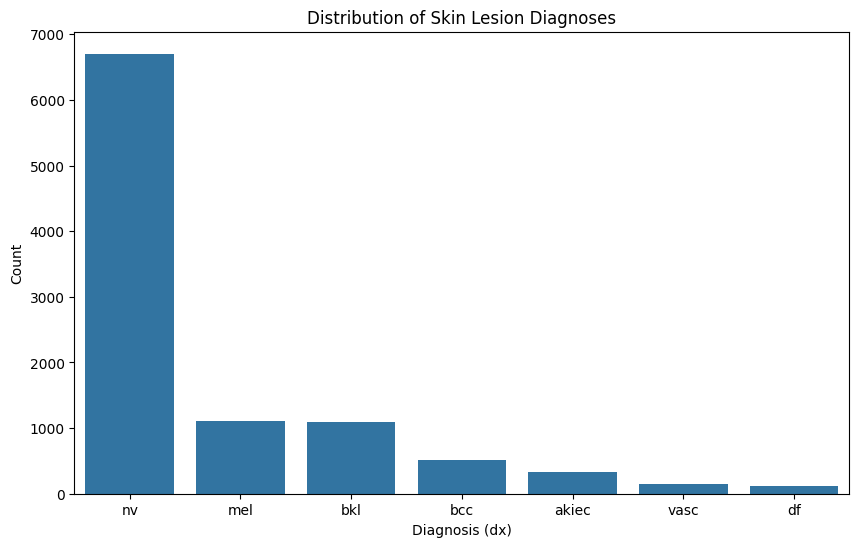

In [5]:
# Fill missing ages with median for visualization
data_pd['age'].fillna(data_pd['age'].median(), inplace=True)

# Distribution of Diagnoses (dx)
plt.figure(figsize=(10, 6))
sns.countplot(data=data_pd, x='dx', order=data_pd['dx'].value_counts().index)
plt.title('Distribution of Skin Lesion Diagnoses')
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Count')
# plt.savefig('diagnosis_distribution.png')
plt.show()
plt.close()



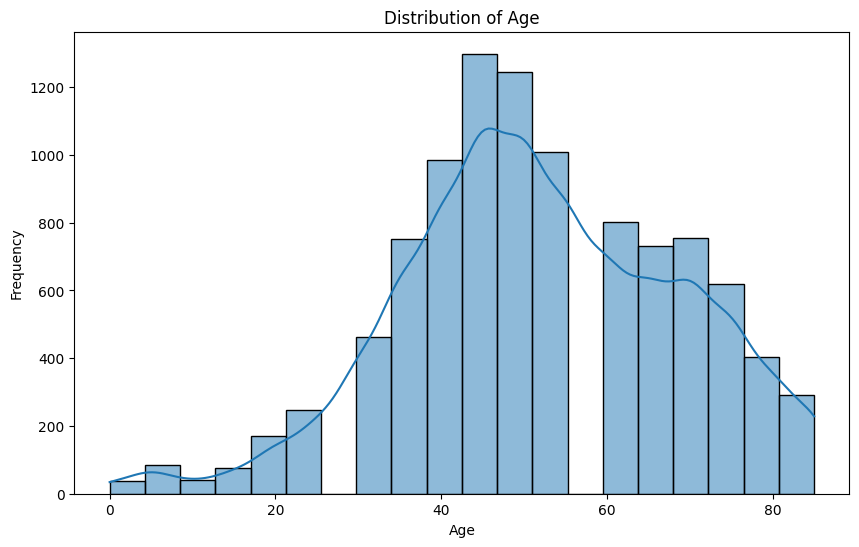

In [6]:
# 2. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_pd['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.savefig('age_distribution.png')
plt.show()
plt.close()



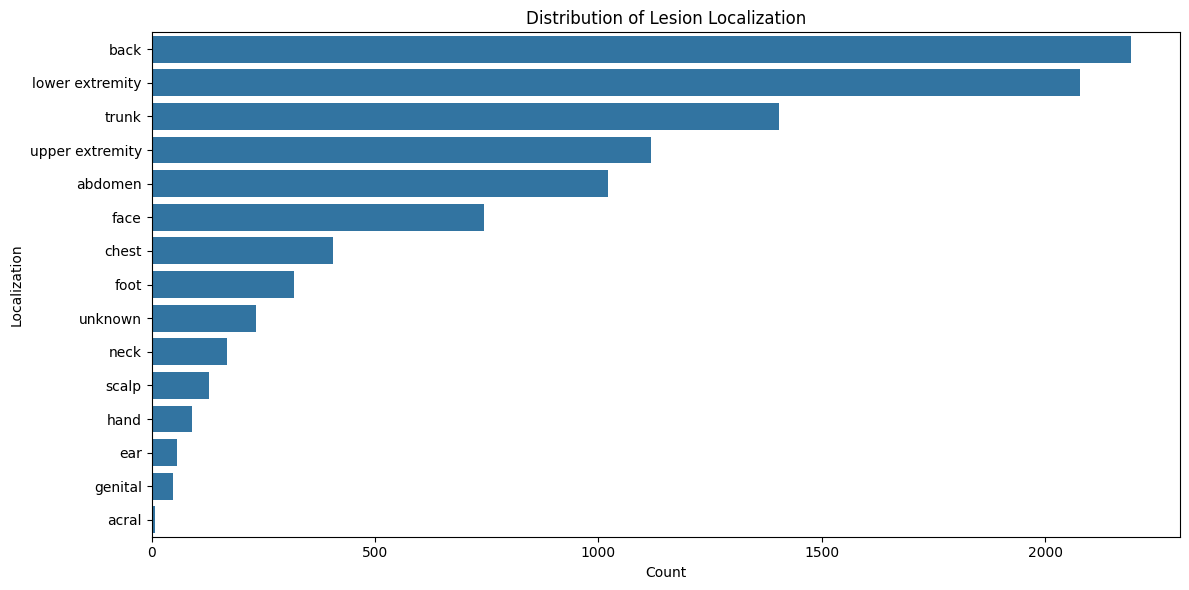

In [7]:
# 3. Localization Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data_pd, y='localization', order=data_pd['localization'].value_counts().index)
plt.title('Distribution of Lesion Localization')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.tight_layout()
# plt.savefig('localization_distribution.png')
plt.show()
plt.close()



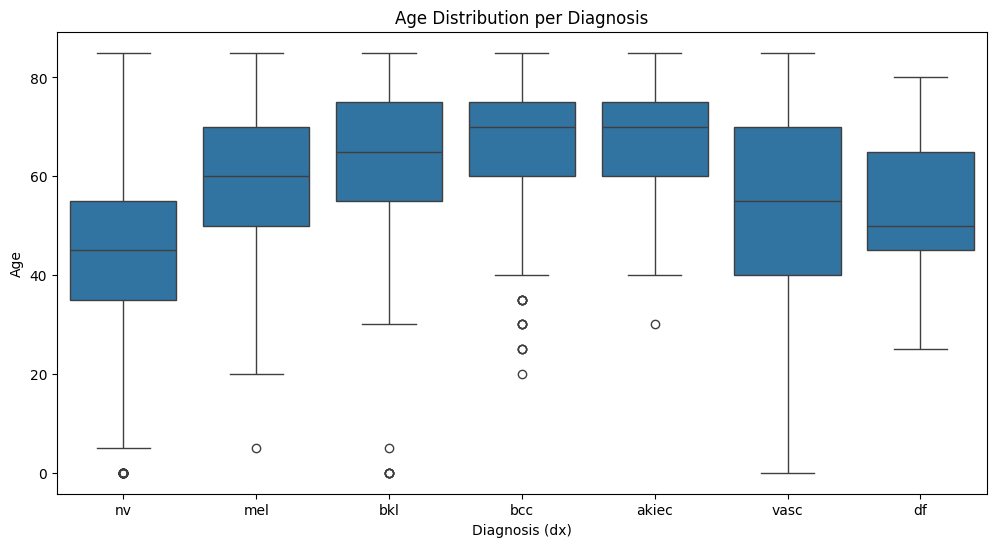

In [8]:
# Age vs Diagnosis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_pd, x='dx', y='age', order=data_pd['dx'].value_counts().index)
plt.title('Age Distribution per Diagnosis')
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Age')
plt.show()
# plt.savefig('age_vs_diagnosis.png')
plt.close()



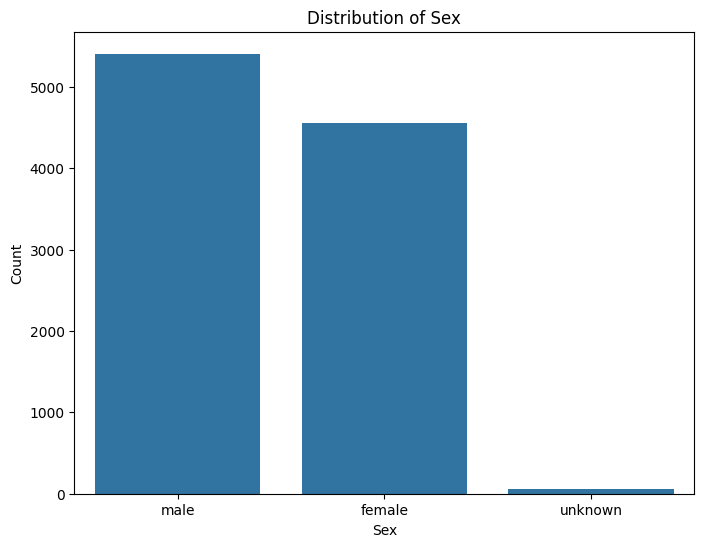

In [9]:
# Sex Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data_pd, x='sex', order=data_pd['sex'].value_counts().index)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
# plt.savefig('sex_distribution.png')
plt.close()



In [10]:
#  Diagnosis vs Sex
plt.figure(figsize=(12, 6))
sns.countplot(data=data_pd, x='dx', hue='sex', order=data_pd['dx'].value_counts().index)
plt.title('Diagnosis Distribution by Sex')
plt.xlabel('Diagnosis (dx)')
plt.ylabel('Count')
plt.savefig('dx_vs_sex.png')
plt.close()

# Basic statistics for the report
dx_counts = data_pd['dx'].value_counts().to_dict()
loc_counts = data_pd['localization'].value_counts().head(5).to_dict()
sex_counts = data_pd['sex'].value_counts().to_dict()

print("Diagnosis Counts:", dx_counts)
print("Top 5 Localization Counts:", loc_counts)
print("Sex Counts:", sex_counts)

Diagnosis Counts: {'nv': 6705, 'mel': 1113, 'bkl': 1099, 'bcc': 514, 'akiec': 327, 'vasc': 142, 'df': 115}
Top 5 Localization Counts: {'back': 2192, 'lower extremity': 2077, 'trunk': 1404, 'upper extremity': 1118, 'abdomen': 1022}
Sex Counts: {'male': 5406, 'female': 4552, 'unknown': 57}


# data pre-processig and prepare for machine learning

In [11]:
# 2. Prevent Data Leakage
# Since multiple images (image_id) can belong to the same lesion (lesion_id),
# we must split the data by lesion_id so that a lesion in the training set
# doesn't appear in the test set.
unique_lesions = data_pd.groupby('lesion_id').first().reset_index()

# 3. Label Encoding for the Target Variable (dx)
le = LabelEncoder()
unique_lesions['dx_label'] = le.fit_transform(unique_lesions['dx'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Diagnosis mapping:", mapping)

# 4. Feature Selection & Encoding
# Categorical features: sex, localization
# Numerical feature: age
features = ['age', 'sex', 'localization']
X = unique_lesions[features]
y = unique_lesions['dx_label']

# One-hot encoding for categorical features
X = pd.get_dummies(X, columns=['sex', 'localization'], drop_first=True)

# 5. Split into Train and Test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Feature Scaling
scaler = StandardScaler()
X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

# Prepare final dataframes for saving
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the processed data
train_data.to_csv('ham10000_train_processed.csv', index=False)
test_data.to_csv('ham10000_test_processed.csv', index=False)

print("\nProcessing Complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("Files saved: ham10000_train_processed.csv, ham10000_test_processed.csv")

Diagnosis mapping: {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

Processing Complete.
Training set shape: (5976, 17)
Testing set shape: (1494, 17)
Files saved: ham10000_train_processed.csv, ham10000_test_processed.csv


# train the rf and evaluate the model

Model Accuracy: 0.3809

Classification Report:

              precision    recall  f1-score   support

       akiec       0.12      0.41      0.19        46
         bcc       0.09      0.20      0.12        65
         bkl       0.36      0.20      0.26       145
          df       0.03      0.53      0.06        15
         mel       0.13      0.15      0.14       123
          nv       0.90      0.44      0.59      1080
        vasc       0.03      0.30      0.06        20

    accuracy                           0.38      1494
   macro avg       0.24      0.32      0.20      1494
weighted avg       0.70      0.38      0.48      1494



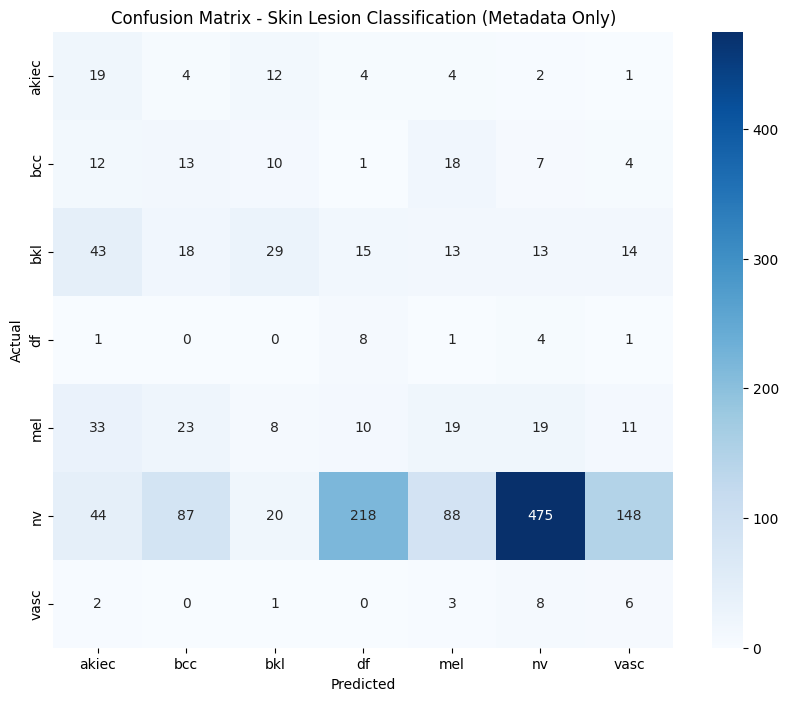

In [15]:
# 1. Load the processed datasets
train_df = pd.read_csv('ham10000_train_processed.csv')
test_df = pd.read_csv('ham10000_test_processed.csv')

# 2. Split into features and target
X_train = train_df.drop('dx_label', axis=1)
y_train = train_df['dx_label']
X_test = test_df.drop('dx_label', axis=1)
y_test = test_df['dx_label']

# 3. Train a Random Forest Classifier
# Using class_weight='balanced' to handle the class imbalance
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])

print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(class_report)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'],
            yticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Skin Lesion Classification (Metadata Only)')
plt.show()
# plt.savefig('confusion_matrix.png')
plt.close()




Feature Importances:
                         Feature  Importance
0                            age    0.534083
11  localization_lower extremity    0.087275
1                       sex_male    0.077232
7              localization_face    0.054802
14            localization_trunk    0.049687
4              localization_back    0.039772
16  localization_upper extremity    0.036265
5             localization_chest    0.024257
12             localization_neck    0.019108
8              localization_foot    0.016705
13            localization_scalp    0.016415
10             localization_hand    0.016271
15          localization_unknown    0.010240
9           localization_genital    0.008858
6               localization_ear    0.005840
2                    sex_unknown    0.003052
3             localization_acral    0.000136


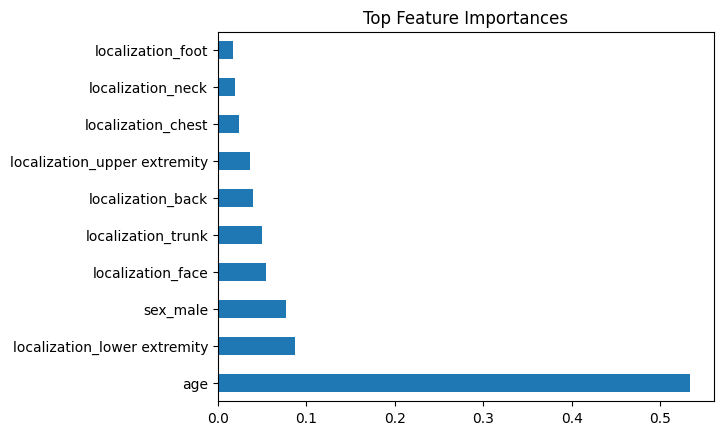

In [21]:
# 7. Feature Importance
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Skin Lesion Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print("\nFeature Importances:")
print(feature_importance_df)


importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()

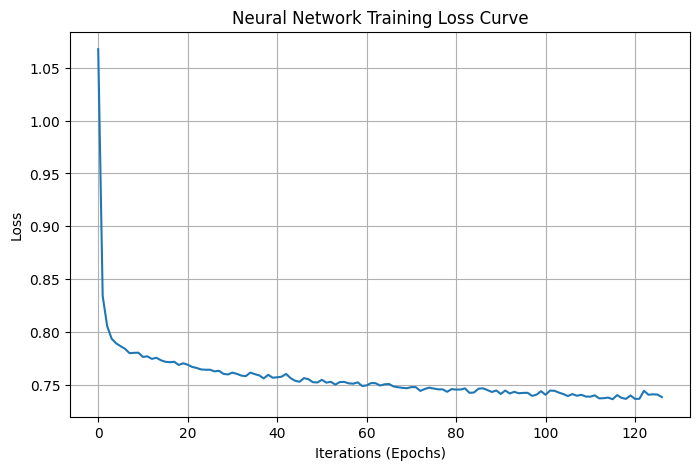

In [13]:

# Load the processed datasets
train_df = pd.read_csv('ham10000_train_processed.csv')
test_df = pd.read_csv('ham10000_test_processed.csv')

X_train = train_df.drop('dx_label', axis=1)
y_train = train_df['dx_label']
X_test = test_df.drop('dx_label', axis=1)
y_test = test_df['dx_label']

# 1. Train an MLP (Multi-Layer Perceptron) to show the Loss Curve
# Neural networks have a 'loss' that decreases over epochs.
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, alpha=1e-4,
                    solver='adam', verbose=False, random_state=42,
                    learning_rate_init=.01)

mlp.fit(X_train, y_train)

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.title('Neural Network Training Loss Curve')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
# plt.savefig('loss_curve.png')
plt.close()



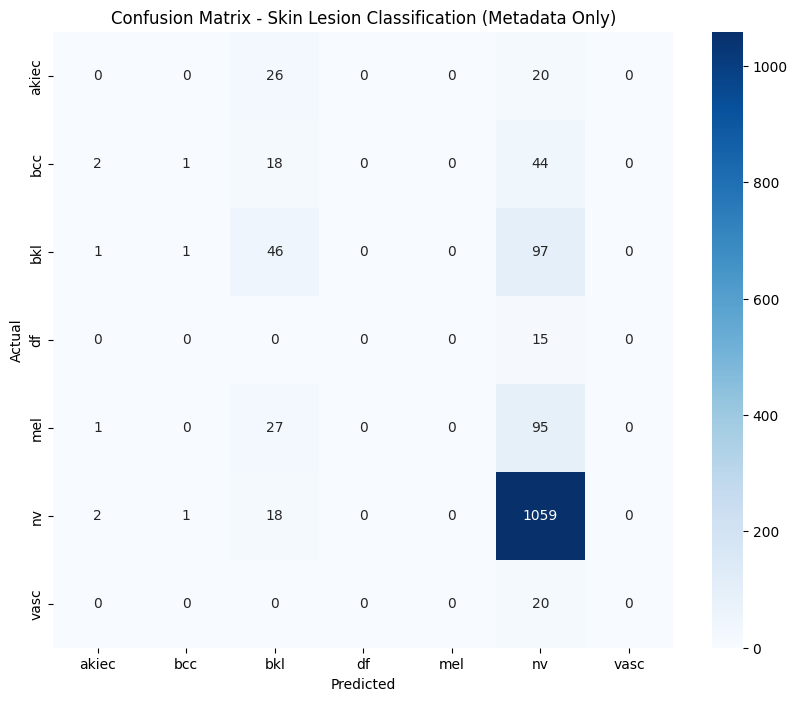

In [35]:
# 2. Confusion Matrix
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'],
            yticklabels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Skin Lesion Classification (Metadata Only)')
plt.show()
# plt.savefig('confusion_matrix.png')
plt.close()




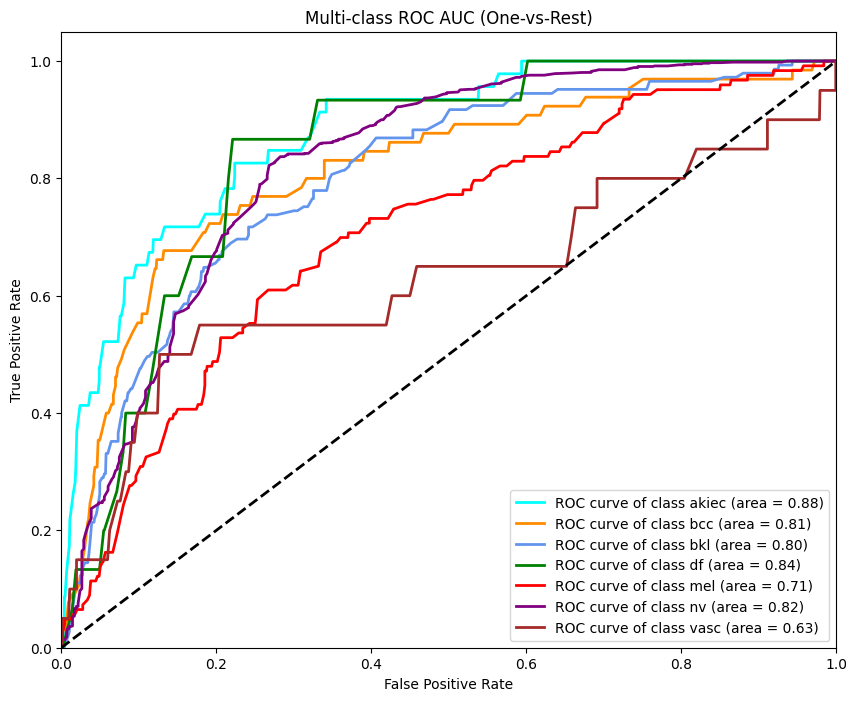

In [28]:
# 3. ROC AUC Curve
# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_score = mlp.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC AUC (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()
# plt.savefig('roc_auc_curve.png')
plt.close()

# print("Plots generated successfully: loss_curve.png, confusion_matrix_mlp.png, roc_auc_curve.png")

In [14]:
# 7. Feature Importance
importances = rf_clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Skin Lesion Classification')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

print("\nFeature Importances:")
print(feature_importance_df)

NameError: name 'rf_clf' is not defined

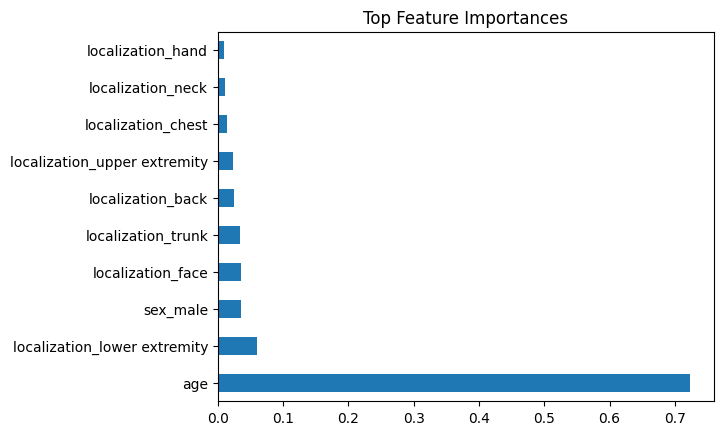

In [37]:
importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()

In [19]:

# Apply SMOTE only to the training data to avoid leaking info into the test set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Original training shape: {y_train.value_counts().to_dict()}")
print(f"Resampled training shape: {y_train_res.value_counts().to_dict()}")

Original training shape: {5: 4323, 2: 582, 4: 491, 1: 262, 0: 182, 6: 78, 3: 58}
Resampled training shape: {5: 4323, 4: 4323, 1: 4323, 0: 4323, 6: 4323, 2: 4323, 3: 4323}



--- Classification Report ---
              precision    recall  f1-score   support

       akiec       0.15      0.39      0.22        46
         bcc       0.13      0.22      0.17        65
         bkl       0.33      0.25      0.28       145
          df       0.04      0.20      0.06        15
         mel       0.13      0.15      0.14       123
          nv       0.88      0.70      0.78      1080
        vasc       0.00      0.00      0.00        20

    accuracy                           0.57      1494
   macro avg       0.24      0.27      0.24      1494
weighted avg       0.69      0.57      0.62      1494



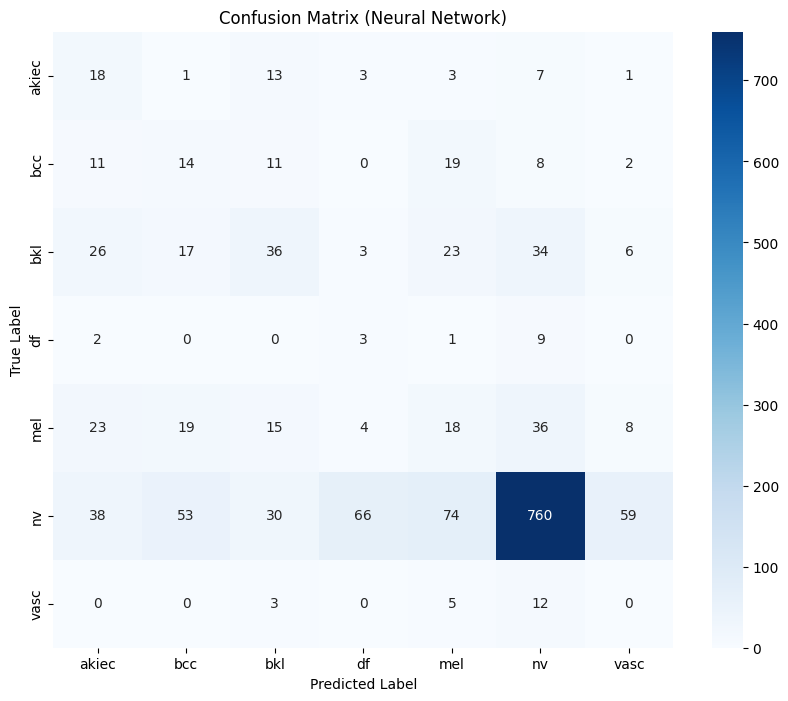

In [22]:

# Initialize and train
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_res, y_train_res)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm_smote = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# plt.savefig('confusion_matrix_mlp.png')
plt.close()

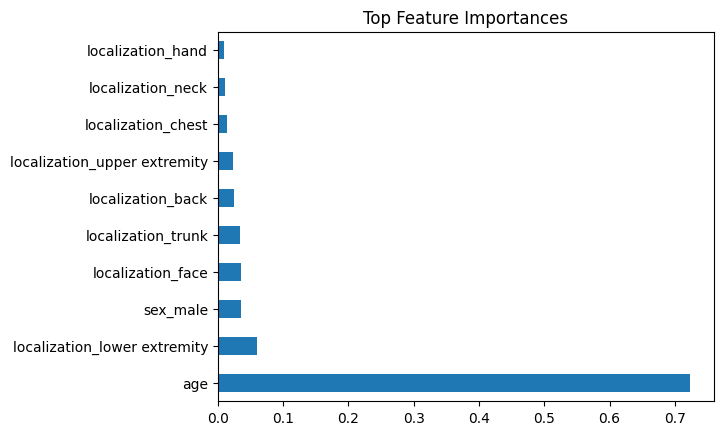

In [21]:
importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()

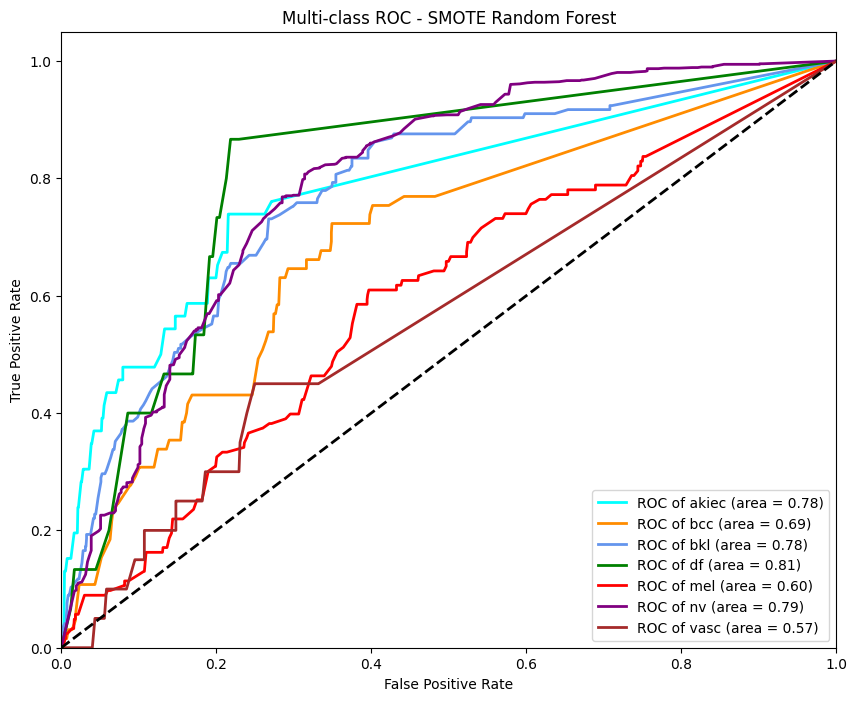

In [25]:

# 1. Binarize the labels for multi-class plotting
# This turns the single column of labels into a matrix of binary indicators
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# 2. Get predicted probabilities for each class
y_score = rf_classifier.predict_proba(X_test)

# 3. Compute ROC curve and ROC area (AUC) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC of {le.classes_[i]} (area = {roc_auc[i]:0.2f})')

# Plot the 'Random Guess' baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC - SMOTE Random Forest')
plt.legend(loc="lower right")
plt.show()

In [8]:
# df_count = df_count[df_count['dx'] == 1]
# df_count.reset_index(inplace=True)

In [9]:
# def duplicates(x):
#     unique = set(df_count['lesion_id'])
#     if x in unique:
#         return 'no' 
#     else:
#         return 'duplicates'

In [10]:
# data_pd['is_duplicate'] = data_pd['lesion_id'].apply(duplicates)
# data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,is_duplicate
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,duplicates


In [11]:
# df_count = data_pd[data_pd['is_duplicate'] == 'no']
# df_count.info()
# df_count

<class 'pandas.core.frame.DataFrame'>
Index: 5514 entries, 10 to 10008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     5514 non-null   object 
 1   image_id      5514 non-null   object 
 2   dx            5514 non-null   object 
 3   dx_type       5514 non-null   object 
 4   age           5467 non-null   float64
 5   sex           5514 non-null   object 
 6   localization  5514 non-null   object 
 7   dataset       5514 non-null   object 
 8   is_duplicate  5514 non-null   object 
dtypes: float64(1), object(8)
memory usage: 430.8+ KB


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,is_duplicate
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,vidir_modern,no
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,vidir_modern,no
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,vidir_modern,no
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,vidir_modern,no
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,rosendahl,no
...,...,...,...,...,...,...,...,...,...
9988,HAM_0001036,ISIC_0027588,akiec,histo,50.0,female,face,rosendahl,no
9990,HAM_0004462,ISIC_0027334,akiec,histo,45.0,male,trunk,vidir_modern,no
9991,HAM_0001152,ISIC_0030133,akiec,histo,65.0,male,face,rosendahl,no
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face,rosendahl,no


In [12]:
# # Keep the first occurrence of every lesion_id and drop the rest
# df_undistorted = data_pd.drop_duplicates(subset='lesion_id', keep='first')

# # Verify the results
# print(f"Original records: {len(data_pd)}")
# print(f"Unique lesions kept: {len(df_undistorted)}")

Original records: 10015
Unique lesions kept: 7470
